In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True) 
#MNIST数据集所在路径

x = tf.placeholder(tf.float32, [None, 784])

y_ = tf.placeholder(tf.float32, [None, 10])


def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver() #定义saver

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
                x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))
#         train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
        sess.run(train_step, 
                 feed_dict={x: batch[0], y_: batch[1],keep_prob: 0.5})
    saver.save(sess, '/tmp/tf_csdn1/model.ckpt') #模型储存位置

    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

In [ ]:
from PIL import Image, ImageFilter
import tensorflow as tf
import matplotlib.pyplot as plt

def imageprepare(): 
    im = Image.open('/root/code/4.jpg') #读取的图片所在路径，注意是28*28像素
    plt.imshow(im)  #显示需要识别的图片
    plt.show()
    im = im.convert('L')
    tv = list(im.getdata()) 
    tva = [(255-x)*1.0/255.0 for x in tv] 
    return tva

result=imageprepare()
x = tf.placeholder(tf.float32, [None, 784])

y_ = tf.placeholder(tf.float32, [None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, '/tmp/tf_csdn/model.ckpt') #使用模型，参数和之前的代码保持一致

    prediction=tf.argmax(y_conv,1)
    predint=prediction.eval(feed_dict={x: [result],keep_prob: 1.0}, session=sess)

    print('识别结果:')
    print(predint[0])

In [ ]:
sess

In [ ]:



from PIL import Image, ImageFilter
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True) 

def imageprepare(): 
    im = Image.open('/root/code/pic_png/0.png') #读取的图片所在路径，注意是28*28像素
    plt.imshow(im)  #显示需要识别的图片
    plt.show()
    im = im.convert('L')
    tv = list(im.getdata()) 
    tva = [(255-x)*1.0/255.0 for x in tv] 
    return tva

result=imageprepare()
x = tf.placeholder(tf.float32, [None, 784])

y_ = tf.placeholder(tf.float32, [None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver()
sess = tf.Session()

sess.run(tf.global_variables_initializer())
saver.restore(sess, '/tmp/tf_csdn1/model.ckpt') #使用模型，参数和之前的代码保持一致
batch = mnist.train.next_batch(50)
#tf.argmax：返回一个张量维数最大的指标。
prediction=tf.argmax(y_conv,1)
predint=prediction.eval(feed_dict={x: [result],keep_prob: 1.0}, session=sess)

print('识别结果:')
print(predint[0])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
INFO:tensorflow:Restoring parameters from /tmp/tf_csdn/model.ckpt


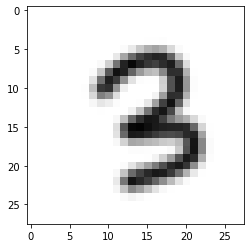

识别结果:
3


In [1]:



from PIL import Image, ImageFilter
import tensorflow as tf
import matplotlib.pyplot as plt

# def imageprepare(): 
#     im = Image.open('/root/code/3.png') #读取的图片所在路径，注意是28*28像素
#     plt.imshow(im)  #显示需要识别的图片
#     plt.show()
#     im = im.convert('L')
#     tv = list(im.getdata()) 
#     tva = [(255-x)*1.0/255.0 for x in tv] 
#     return tva

# result=imageprepare()
x = tf.placeholder(tf.float32, [None, 784])

y_ = tf.placeholder(tf.float32, [None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver()
sess = tf.Session()

sess.run(tf.global_variables_initializer())
saver.restore(sess, '/tmp/tf_csdn/model.ckpt') #使用模型，参数和之前的代码保持一致

prediction=tf.argmax(y_conv,1)
im = Image.open('/root/code/pic_png/3.png') #读取的图片所在路径，注意是28*28像素
plt.imshow(im)  #显示需要识别的图片
plt.show()
im = im.convert('L')
tv = list(im.getdata()) 
tva = [(255-x)*1.0/255.0 for x in tv] 
predint=prediction.eval(feed_dict={x: [tva],keep_prob: 1.0}, session=sess)

print('识别结果:')
print(predint[0])
#用了函数处理 图像数据 所以用x:【result】

In [ ]:



from PIL import Image, ImageFilter
import tensorflow as tf
import matplotlib.pyplot as plt

# def imageprepare(): 
#     im = Image.open('/root/code/3.jpg') #读取的图片所在路径，注意是28*28像素
#     plt.imshow(im)  #显示需要识别的图片
#     plt.show()
#     im = im.convert('L')
#     tv = list(im.getdata()) 
#     tva = [(255-x)*1.0/255.0 for x in tv] 
#     return tva

# result=imageprepare()
x = tf.placeholder(tf.float32, [None, 784])

y_ = tf.placeholder(tf.float32, [None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver()
sess = tf.Session()

sess.run(tf.global_variables_initializer())
saver.restore(sess, '/tmp/tf_csdn/model.ckpt') #使用模型，参数和之前的代码保持一致

im = Image.open('/root/code/3.png') #读取的图片所在路径，注意是28*28像素

plt.imshow(im)  #显示需要识别的图片
plt.show()
im = im.convert('L')
tv = list(im.getdata()) 
tva = [(255-x)*1.0/255.0 for x in tv] 

prediction=tf.argmax(y_conv,1)
predint=prediction.eval(feed_dict={x: [tva],keep_prob: 1.0}, session=sess)

print('识别结果:')
print(predint[0])
#正常处理 用tva变量赋值形式 图像数据 所以用x:【tva】

In [3]:
def prediction(sess,adds):
    from PIL import Image, ImageFilter
#     import tensorflow as tf
#     import matplotlib.pyplot as plt
    numbers = []
    for add in adds:
        im = Image.open(add) #读取的图片所在路径，注意是28*28像素
#         plt.imshow(im)  #显示需要识别的图片
#         plt.show()
        im = im.convert('L')
        tv = list(im.getdata()) 
        tva = [(255-x)*1.0/255.0 for x in tv] 
#         sess.run(tf.global_variables_initializer())
#         saver.restore(sess, '/tmp/tf_csdn/model.ckpt') #使用模型，参数和之前的代码保持一致
        prediction=tf.argmax(y_conv,1)
        predint=prediction.eval(feed_dict={x:[tva],keep_prob: 1.0},
                                session=sess)

        
        numbers.append(predint[0])
#     print(numbers)
    return numbers
  
adds = ["/root/code/pic_png/0.png","/root/code/pic_png/2.png","/root/code/pic_png/8.png"]
prediction(sess,adds)
#部署不进去 加引号的话  说 不在 说 x 不在 graph中

[0, 2, 8]

In [26]:
def prediction(sess,adds):
    from PIL import Image, ImageFilter
#     import tensorflow as tf
#     import matplotlib.pyplot as plt
    numbers = []
    for add in adds:
        im = Image.open(add) #读取的图片所在路径，注意是28*28像素
#         plt.imshow(im)  #显示需要识别的图片
#         plt.show()
        im = im.convert('L')
        tv = list(im.getdata()) 
        tva = [(255-x)*1.0/255.0 for x in tv] 
#         sess.run(tf.global_variables_initializer())
#         saver.restore(sess, '/tmp/tf_csdn/model.ckpt') #使用模型，参数和之前的代码保持一致
        prediction=tf.argmax(y_conv,1)
#         predint=prediction.eval(feed_dict={x:[tva],keep_prob: 1.0},
#                                 session=sess)
        predints=sess.run(prediction,feed_dict={x:[tva],keep_prob: 1.0})
        """
        tf.run()  tf.eval() 的区别
        在使用t.eval()等价于：tf.get_default_session().run(t)
        tf.run(t,feed_dict{}) ==> tf.eval(feed_dict{})

        """
        
        numbers.append(predint[0])
#     print(numbers)
    return numbers
  
# adds = ["/root/code/pic_png/0.png","/root/code/pic_png/2.png","/root/code/pic_png/8.png"]
adds = ["/root/code/pic_png/0.png"]
prediction(sess,adds)
#部署不进去 加引号的话  说 不在 说 x 不在 graph中
#不加 部署不进去

TypeError: Cannot interpret feed_dict key as Tensor: The name 'x' looks like an (invalid) Operation name, not a Tensor. Tensor names must be of the form "<op_name>:<output_index>".

In [19]:
sess

In [ ]:
def prediction1(sess, inputs):
    from PIL import Image, ImageFilter
    import tensorflow as tf
    import matplotlib.pyplot as plt
    numbers = []
#     global y_l
#     y_l = y_conv
    for add in adds:
        im = Image.open(add) #读取的图片所在路径，注意是28*28像素
        plt.imshow(im)  #显示需要识别的图片
        plt.show()
        im = im.convert('L')
        tv = list(im.getdata()) 
        tva = [(255-x)*1.0/255.0 for x in tv] 

#         prediction=tf.argmax(y_l,1)
        predint=prediction.eval(feed_dict={"x: [tva]","keep_prob: 1.0"},
                                session=sess)
        numbers.append(predint[0])
    print(numbers)
  
adds = ["/root/code/3.jpg","/root/code/0.jpg","/root/code/8.jpg"]
prediction(sess,adds)

In [ ]:
def predict3(sess, inputs):
    predint=prediction.eval(feed_dict={"x":inputs,keep_prob: 1.0},
                                session=sess)
    # `X` is used, it must be defined in the model with that name explicitly!
    return [str(p) for p in predint]
#部署 函数 一定要用sess.run 因为clipper只取到 sess ？？

In [ ]:
adds = ["/root/code/3.jpg","/root/code/0.jpg","/root/code/8.jpg"]
predict3(sess,adds)

In [2]:
def predict3(sess, adds):
    results=[]
    for add in adds:
        im = Image.open(add) #读取的图片所在路径，注意是28*28像素
#         plt.imshow(im)  #显示需要识别的图片
#         plt.show()
        im = im.convert('L')
        tv = list(im.getdata()) 
        tva = [(255-x)*1.0/255.0 for x in tv]
        predint=sess.run('predint:0',feed_dict={"x:[tva]":add})
        results.append(str(predint[0]))
    return results
#x的操作不在局部图中 
adds = ["/root/code/0.png","/root/code/2.png","/root/code/8.png"]
predict3(sess,adds)

FileNotFoundError: [Errno 2] No such file or directory: '/root/code/0.png'

In [ ]:
def predict3(sess, inputs):
    predint=sess.run('train_step',
                     feed_dict={"x":inputs, keep_prob: 0.5})
    # `X` is used, it must be defined in the model with that name explicitly!
    return [str(p) for p in predint]

In [ ]:
inputs= ["/root/code/pic_png/8.png"]
predict3(sess,inputs)

In [5]:
def predict2(sess, inputs):
    plc = inputs[0]
    preds = prediction.eval('prediction', 
                            feed_dict={'x:plc','keep_prob:1.0'},
                            session=sess) 
    # `X` is used, it must be defined in the model with that name explicitly!
    return [str(p) for p in preds]

In [ ]:
predict2(sess,["/root/code/8.jpg"])

In [ ]:
from clipper_admin import ClipperConnection, DockerContainerManager
from clipper_admin.deployers.tensorflow import deploy_tensorflow_model
clipper_conn = ClipperConnection(DockerContainerManager())

In [ ]:
clipper_conn.start_clipper()

In [ ]:
clipper_conn.connect()

In [ ]:
clipper_conn.register_application(
    name="mnist-app", input_type="strings", default_output="-1.0", slo_micros=100000)

In [ ]:
deploy_tensorflow_model(
    clipper_conn,
    name="mnist-mod",
    version=1, # version 2 of the same model, `predict` endpoint will be updated 
    # automatically to the newest model version
    input_type="strings",
    tf_sess_or_saved_model_path=sess,
    func=prediction,
    pkgs_to_install=['pillow'])

In [ ]:
clipper_conn.get_all_apps()

In [ ]:
# Link the model and the app
clipper_conn.link_model_to_app(
    app_name="mnist-app",
    model_name="mnist-mod")

In [ ]:
# Get query address
query_address = clipper_conn.get_query_addr()

In [ ]:
# Run a query
import requests, json, numpy as np
headers = {"Content-type": "application/json"}
requests.post("http://"+query_address+"/mnist-app/predict", headers=headers, data=json.dumps({
    "input": ["/root/code/3.jpg","/root/code/0.jpg","/root/code/8.jpg"]})).json()

In [ ]:
import base64
import json
import requests

In [ ]:

from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import json
import requests

def query_json(addr, filename, image_format):
    url = "http://%s/mnist-app/predict" % addr
    req_json = json.dumps({
        "input":
        json.dumps({
            'data':[(255-x)*1.0/255.0 for x in list(Image.open(filename).convert('L').getdata())], 
            'format': image_format
        })
    })
    headers = {'Content-type': 'application/json'}
    r = requests.post(url, headers=headers, data=req_json)
    print(r.json())
    
#数据处理还是不能成功预测 

In [ ]:
import base64
import json
import requests
def query_json(addr, filename, image_format):
    url = "http://%s/mnist-app/predict" % addr
    req_json = json.dumps({
        "input":
        json.dumps({
            'data': base64.b64encode(open(filename, "rb").read()).decode(),
            'format': image_format
        })
    })
    headers = {'Content-type': 'application/json'}
    r = requests.post(url, headers=headers, data=req_json)
    print(r.json())

In [ ]:
query_json(query_address, "/root/code/3.png", 'png')
# 数据处理在请求之前 依然收不到正常预测

In [ ]:
clipper_conn.stop_all()